In [1]:
# add parent directory to path: enable import from parent dir
import sys
sys.path.append('../')

from environment import SmartBrokerEnv
from agents.a2c import A2C
from networks.a2c.actor import Actor
from networks.a2c.critic import Critic

import torch

norm_cols = ['Volume XRP']
cols = ['date'] + ['open', 'high', 'low', 'close', f'Volume XRP']
batch_dur = 50
env = SmartBrokerEnv(
    batch_dur=batch_dur,
    df_info={
        'start_date': '2021-01-01',
        'end_date': '2021-03-01',
        'norm_cols': norm_cols,
        'cols': cols,
    },
    portfolio={

    },
)

actor_model = Actor(
    state_dim=batch_dur*3+3,
    action_dim=3,
)
critic_model = Critic(state_dim=batch_dur*3+3)
a2c = A2C(
    env=env, 
    actor=actor_model,
    critic=critic_model,
    n_actns=3,
    actor_optmz=torch.optim.Adam(actor_model.parameters(), lr=0.00008),
    critic_optmz=torch.optim.Adam(critic_model.parameters(), lr=0.00005),
    hyprprms={
        'gamma': 0.9995,
    },
    log_freq=1,
    mdl_pth='../models/a2c_nn_3',
    load_models=False,
)

In [2]:
a2c.run(1000)


Ep: 0 | TS: 19970 | L: 3.178 | R: -5.26 | P: 32.76 | R.Avg P: 32.76 | NW: 132.76 | R.Avg NW: 132.76 | R.U: 276
Ep: 1 | TS: 39940 | L: 3.144 | R: -6.39 | P: 28.87 | R.Avg P: 30.82 | NW: 128.87 | R.Avg NW: 130.82 | R.U: 269
Ep: 2 | TS: 59910 | L: 3.097 | R: -10.02 | P: 17.78 | R.Avg P: 26.47 | NW: 117.78 | R.Avg NW: 126.47 | R.U: 261
Ep: 3 | TS: 79880 | L: 3.08 | R: -12.37 | P: 10.33 | R.Avg P: 22.44 | NW: 110.33 | R.Avg NW: 122.43 | R.U: 252
Ep: 4 | TS: 99850 | L: 3.011 | R: -21.02 | P: -17.86 | R.Avg P: 14.38 | NW: 82.14 | R.Avg NW: 114.38 | R.U: 237
Ep: 5 | TS: 119820 | L: 2.945 | R: -4.56 | P: 32.45 | R.Avg P: 17.39 | NW: 132.45 | R.Avg NW: 117.39 | R.U: 245
Ep: 6 | TS: 139790 | L: 2.885 | R: -3.31 | P: 37.64 | R.Avg P: 20.28 | NW: 137.64 | R.Avg NW: 120.28 | R.U: 252
Ep: 7 | TS: 159760 | L: 2.889 | R: -16.51 | P: -3.63 | R.Avg P: 17.29 | NW: 96.37 | R.Avg NW: 117.29 | R.U: 246
Ep: 8 | TS: 179730 | L: 2.862 | R: -9.14 | P: 17.89 | R.Avg P: 17.36 | NW: 117.89 | R.Avg NW: 117.36 | R.U

KeyboardInterrupt: 

/Users/vinay/miniforge3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/vinay/miniforge3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


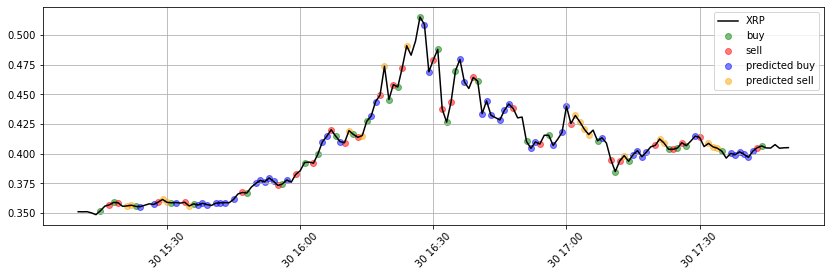

Avg.Rewards: -10.32 | Tot.Profit: 1088.93 | Avg.Profit: 7.26 | Avg.Units: 166 


In [11]:
rewards, profits, actions = a2c.evaluate(start_dt='2021-01-30 15:15', duration=150, show_pred=True)

In [ ]:
actions, len(actions)

## Visualizations

### Training 

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(16, 12))
r_avg_rewards = []
r_avg_profits = []
r_avg_bal = []
r_avg_units_held = []
r_avg_loss = []
r_avg_net_worth = []
count = 0

for _, log in a2c.logs.items():
    r_avg_rewards.append(log['r_avg_reward'])
    r_avg_profits.append(log['r_avg_profit'])
    r_avg_bal.append(log['r_avg_bal'])
    r_avg_units_held.append(log['r_avg_units_held'])
    r_avg_loss.append(log['r_avg_loss'])
    r_avg_net_worth.append(log['r_avg_net_worth'])
    count += 1

ax[0][0].plot(range(count), r_avg_loss)
ax[0][0].set_title('Rolling avg loss per episode')

ax[0][1].plot(range(count), r_avg_rewards)
ax[0][1].set_title('Rolling avg reward per episode')

ax[1][0].plot(range(count), r_avg_profits)
ax[1][0].set_title('Rolling avg profit per episode')

ax[1][1].plot(range(count), r_avg_units_held)
ax[1][1].set_title('Rolling avg units held per episode')

ax[2][0].plot(range(count), r_avg_net_worth)
ax[2][0].set_title('Rolling avg net worth per episode')

ax[2][1].plot(range(count), r_avg_bal)
ax[2][1].set_title('Rolling avg balance per episode')

In [ ]:
# torch.save(a2c.actor.state_dict(), '../models/a2c_nn_3/actor')
# torch.save(a2c.critic.state_dict(), '../models/a2c_nn_3/critic')

In [ ]:
# import pickle
# with open("../pickles/a2c_logs_main.pickle","wb") as f:
#     temp = dict(a2c.logs)
#     pickle.dump(temp, f, pickle.HIGHEST_PROTOCOL)